In [1]:
### import libraries
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import ipynb.fs.full.Img2Img 
from ipynb.fs.full.Img2Img import *
# %run Img2Img.ipynb        
### Set path
gr.set_static_paths(paths=["images/"])

In [2]:
### Test function for applying to image
def diffusion(input_img):
    # get the size of image
    # generate new ones by diffusion
    # remove background
    # resize to the original size
    ### testing code: sepia filer
    sepia_filter = np.array([
        [0.393, 0.769, 0.189],
        [0.349, 0.686, 0.168],
        [0.272, 0.534, 0.131]
    ])
    sepia_img = input_img.dot(sepia_filter.T)
    sepia_img /= sepia_img.max()
    print(input_img.shape, sepia_img.shape)
    
    return sepia_img

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


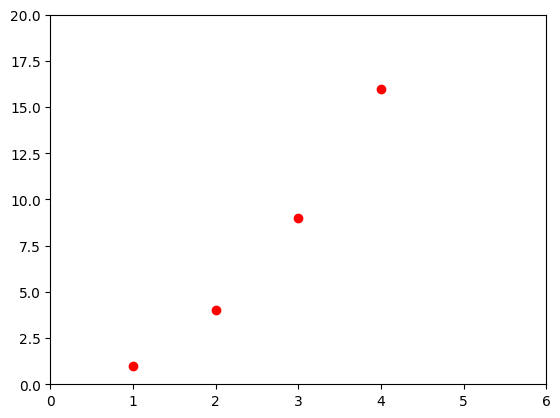

In [3]:
### Interface for authoring
panel_number = 4
# image seqeucne
panel_list = []

with gr.Blocks() as demo:
    with gr.Row():
        
        with gr.Column(scale = 1):
            chara_1 = gr.Image(height = 100, width = 100)
            chara_2 = gr.Image(height = 100, width = 100)
            gr.Button(value = "+")

        
        with gr.Column(scale = 1):
            scene_1 = gr.Image(height = 100, width = 100)
            scene_2 = gr.Image(height = 100, width = 100)
            gr.Button(value = "+")

        with gr.Column(scale = 7):
            with gr.Row():
                # image seqeucne
                # for total_panel in range(panel_number):
                #     panel_list[total_panel].value = "images/panel_"+str(total_panel+1)+".png"
                for total_panel in range(panel_number):
                    image_path = "images/panel_"+str(total_panel+1)+".png"
                    # print(image_path)
                    panel_list.append(gr.Image(value=image_path, height = 100, width = 100, type ="pil"))                    
         
            with gr.Row():
                with gr.Row():
                    gr.Label(value = "Nrrative Arc")
                    
                with gr.Row():
                    ### test with plot
                    plt.plot([1,2,3,4], [1,4,9,16], 'ro')
                    plt.axis([0, 6, 0, 20])
                    gr.Plot(value = plt)

        with gr.Column(scale = 1):
            with gr.Row():
                gr.Label(value = "AI suggestions")
                gr.Button(value = "Narrative Arc")
                gr.Button(value = "Panel Transition")
                gr.Button(value = "Composition")
                gr.Button(value = "Narrative Grammar")
                gr.Button(value = "Textboxes")
                gr.Button(value = "Customized icons")
                gr.Button(value = "+")

    with gr.Row():
        gr.Button(value = "Layout")
    with gr.Row():
        gr.Label(value = "Page Result")
    with gr.Row():
        gr.Image(height = 500, width = 500)
                
                
            
demo.launch()

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Diffuser initialized.


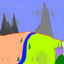

In [4]:
# run a diffuser
used_strength = 0.75
used_guidance_scale =7.5

diffuser = Img2ImgDiffuser(used_strength, used_guidance_scale, used_prompt ="A fantasy landscape, trending on artstation" )

input_img_url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(input_img_url)
init_img = Image.open(BytesIO(response.content)).convert("RGB")
init_img = init_img.resize((64, 64))
init_img



https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg
you gave a image path


  0%|          | 0/37 [00:00<?, ?it/s]

<PIL.Image.Image image mode=RGB size=128x128 at 0x21DDAF61120>


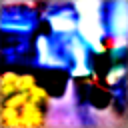

In [5]:
## test image path
print(input_img_url)
new_img = diffuser.stable_diffusion_model(input_img_url)
print(new_img)
new_img